In [ ]:
pip install pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('patient_dataset.csv')  # Replace with your dataset filename

# Data Preprocessing
# Handle missing values if any (e.g., data.dropna())
# Encode categorical variables if needed (e.g., using pd.get_dummies)

# Split the data into features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)



Accuracy: 0.7666666666666667
ROC AUC Score: 0.8602753697093319
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.81      0.57      0.67        37

    accuracy                           0.77        90
   macro avg       0.78      0.74      0.74        90
weighted avg       0.77      0.77      0.76        90

Confusion Matrix:
[[48  5]
 [16 21]]


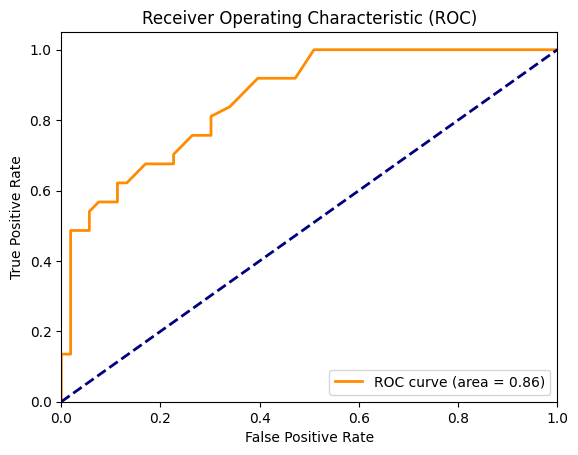

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

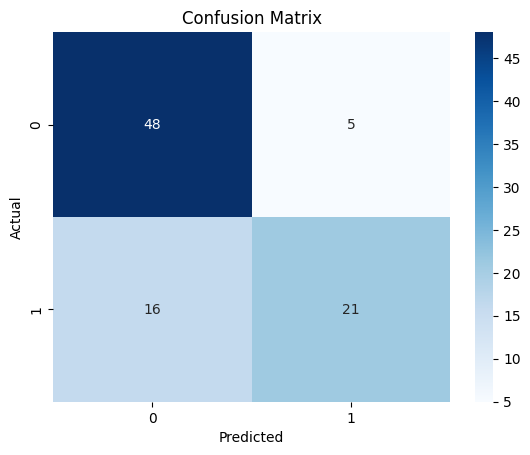

In [ ]:
import seaborn as sns

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


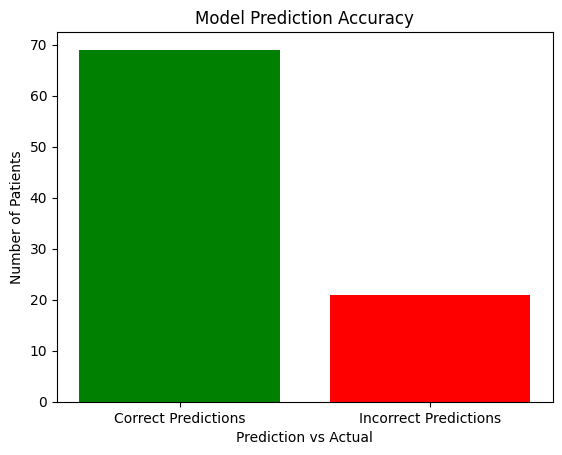

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have predictions and actual labels for a set of patients
predictions = model.predict(X_test)  # Replace with your test data
actual_labels = y_test  # Replace with your test labels

# Count the number of correct and incorrect predictions
correct_predictions = np.sum(predictions == actual_labels)
incorrect_predictions = len(actual_labels) - correct_predictions

# Create a bar graph
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction vs Actual')
plt.ylabel('Number of Patients')
plt.title('Model Prediction Accuracy')
plt.show()


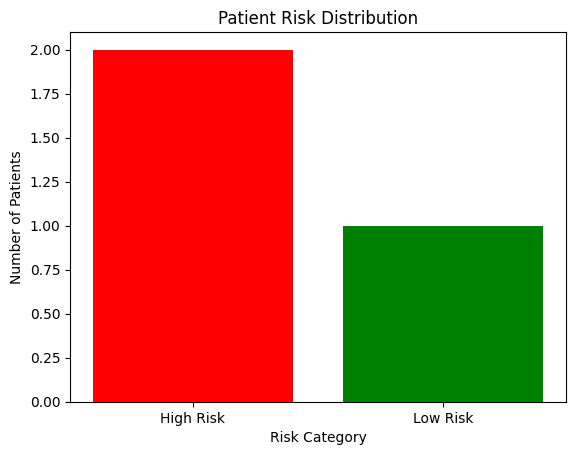

In [ ]:
# Separate patients into high and low-risk groups
high_risk_patients = [patient for patient in patient_data if patient['risk_prediction'] == 1]
low_risk_patients = [patient for patient in patient_data if patient['risk_prediction'] == 0]

# Create a bar graph to visualize the number of patients in each risk group
categories = ['High Risk', 'Low Risk']
patient_counts = [len(high_risk_patients), len(low_risk_patients)]

plt.bar(categories, patient_counts, color=['red', 'green'])
plt.xlabel('Risk Category')
plt.ylabel('Number of Patients')
plt.title('Patient Risk Distribution')
plt.show()


In [ ]:
# Assuming you have a trained model, you can use it to predict the risk for a specific patient
patient_data = {
    'age': 65,
    'anaemia': 1,  # 1 for yes, 0 for no
    'creatinine_phosphokinase': 150,
    'diabetes': 0,  # 1 for yes, 0 for no
    'ejection_fraction': 40,
    'high_blood_pressure': 1,  # 1 for yes, 0 for no
    'platelets': 250000,
    'serum_creatinine': 1.2,
    'serum_sodium': 137,
    'sex': 1,  # 1 for male, 0 for female
    'smoking': 0,  # 1 for yes, 0 for no
    'time': 100
}

# Create a DataFrame from the patient's data
patient_df = pd.DataFrame([patient_data])

# Standardize the patient data if you used standardization during training
patient_df = scaler.transform(patient_df)  # Assuming 'scaler' is the scaler used during training

# Make a prediction
risk_prediction = model.predict(patient_df)
if risk_prediction[0] == 1:
    print("High Risk: The patient is at risk of death.")
else:
    print("Low Risk: The patient is not at risk of death.")


Low Risk: The patient is not at risk of death.
